퀀들에서는 다양한 정형 데이터를 제공해주고 있음

가입을 하고 API키를 발급받으면 각종 데이터를 제공받을 수 있는 곳임.

In [ ]:
pip install quandl

In [71]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
quandl.ApiConfig.api_key = 'Wx2tsitr-vSZKzfw1gYU'


[링크 텍스트](https://)WGC : World gold counci

2000-2011년까지의 monthly data를 불러온다.

In [53]:
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD', start_date='2000-01-01', end_date='2019-12-31') 
df.rename(columns={'Value': 'price'}, inplace=True) 
df = df.resample('M').last()


In [54]:
print(f'Shape of DataFrame', {df.shape})
df.head(242)

Shape of DataFrame {(240, 1)}


,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19
...,...
2019-08-31,1498.80
2019-09-30,1511.31
2019-10-31,1494.80


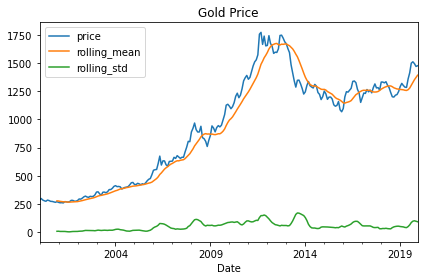

In [72]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()  #이동평균선을 도출한다. (여기서는 12개월 이동평균을 사용함)
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()    #표준편차의 이동평균을 도출한다.
df.plot(title='Gold Price')

plt.tight_layout()
plt.show()

rolling_std를 보면, 시간의 흐름에 따라 Std가 조금씩 상승하는 것을 볼 수 있음.

따라서 승법 모델 (multiplicative model)을 사용하는 것이 좋다고 볼 수 있을 것임.


https://online.stat.psu.edu/stat510/lesson/5/5.1 (참고)

- Additive: 
x_t = Trend + Seasonal + Random
- Multiplicative: 
x_t = Trend * Seasonal * Random

The additive model is useful when the seasonal variation is relatively constant over time.

The multiplicative model is useful when the seasonal variation increases over time.


Text(0.5, 0.98, 'Multiplicative Decomposition')

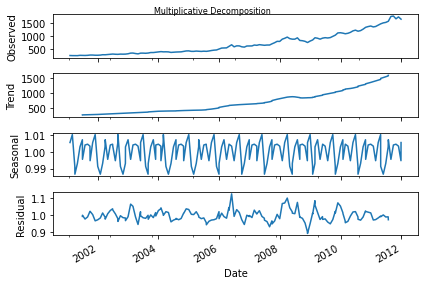

In [66]:
decomposition_results = seasonal_decompose(gold, model='multiplicative', freq=12)
decomposition_results.plot().suptitle('Multiplicative Decomposition', fontsize=8)